# 编程练习 2: 逻辑回归

## 1 逻辑回归

在这部分练习中，将会建立一个逻辑回归模型来预测一个学生能否被大学录取。

假设你是一所大学的某部门的管理员，并且你想根据每位申请同学的两次考试成绩来确定他们的录取机会。你拥有以前申请人的历史数据可以用作逻辑回归的训练集。对于每个训练示例，都有申请人两次考试的成绩和录取决定。

任务是建立一个分类模型，根据这两项考试的成绩来评估申请人的录取概率。

### 1.1 可视化数据



In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = './data/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Score1', 'Score2','Admitted'])
data.head() # 返回数据的前 n行，默认为5

,Score1,Score2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


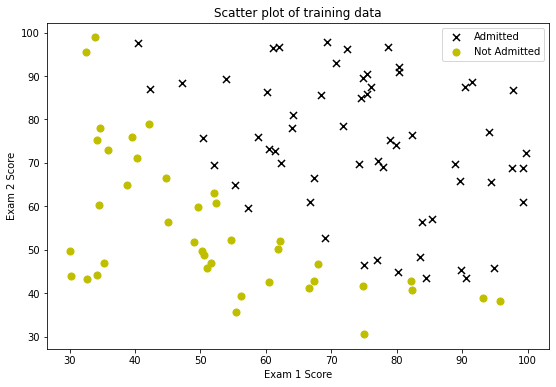

In [98]:
admitted = data[data['Admitted'].isin([1])]
not_admitted = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(admitted['Score1'], admitted['Score2'], s=50, c='k', marker='x', label='Admitted')
ax.scatter(not_admitted['Score1'], not_admitted['Score2'], s=50, c='y', marker='o', label='Not Admitted')
ax.legend()
ax.set_title('Scatter plot of training data')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

### 1.2 实现

#### 1.2.1 sigmoid 函数

在开始实际代价函数之前，逻辑回归假设定义为：$${h_\theta \left( x \right)} = g \left( \theta^T x \right)$$

g是sigmoid函数，定义为：$$g \left( z \right) = \frac{1}{1 + e^{-z}}$$

首先实现sigmoid函数

In [99]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) # np.exp(-z) => e^(-z)

测试sigmoid函数

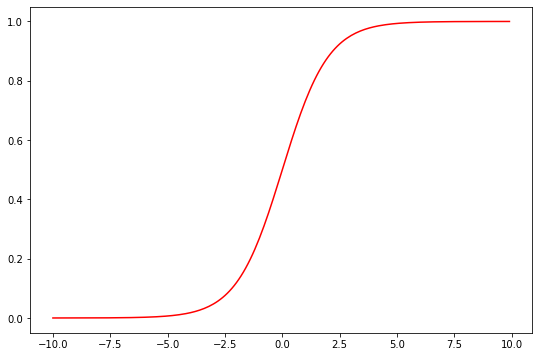

In [100]:
x = np.arange(-10, 10, 0.1)
plt.figure(figsize=(9,6))
plt.plot(x, sigmoid(x), c='r')
plt.show()

#### 1.2.2 代价函数和梯度

逻辑回归中的代价函数：
$$J\left( \theta \right) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{\left(i\right)} \log{\left(h_\theta \left(x^{\left(i\right)}\right) \right)} - \left(1 - y^{\left(i\right)}\right) log{\left( 1 - h_\theta \left(x^{\left(i\right)}\right) \right)} ]$$

In [101]:
def cost(theta, X, y):
    theta, X, y = np.mat(theta), np.mat(X), np.mat(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / X.shape[0]

实现完成后，用初始参数 $\theta$ 代入代价函数计算，结果应是 0.693

In [102]:
data.insert(0, 'Ones', 1)
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
theta = np.mat(np.zeros(X.shape[1]))
X = np.array(X.values)
y = np.array(y.values)

In [103]:
# 查看一下矩阵维度
X.shape, theta.shape, y.shape

((100, 3), (1, 3), (100, 1))

In [104]:
cost(theta, X, y)

0.6931471805599453

代价的梯度是一个和 $\theta$ 长度相同的向量，其中第 $j$ 个元素的定义如下：
$$\frac{\partial J \left( \theta \right)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m {\left( {h_\theta \left( x^{\left(i\right)} \right)} - y^{\left(i\right)} \right)}x_j^{\left(i\right)}$$

虽然这个梯度看起来和线性回归相同，但是实际公式是不同的，因为线性回归和逻辑回归有不同的 $h_\theta \left(x\right)$

In [105]:
def gradient(theta, X, y):
    theta, X, y = np.mat(theta), np.mat(X), np.mat(y)
    params = int(theta.shape[1]) #向量 θ 中的参数个数
    grad = np.zeros(params) #初始化 θ 临时矩阵，用于同时更新
    error = sigmoid(X * theta.T) - y

    for i in range(params): #计算每个参数
        term = np.multiply(error, X[:,i]) # multiply 为矩阵对应相乘
        grad[i] = np.sum(term) / X.shape[0]

    return grad

In [106]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

#### 1.2.3 使用工具库学习参数 $\theta$

在前面的练习中，通过实现梯度下降找到了线性回归模型的最佳参数，编写代价函数并计算其梯度，然后采取相应的梯度下降步骤。现在，使用 scipy.optimize.fmin_tnc 函数（Andrew-Ng在课程中用的是Octave的“fminunc”函数），而不是使用梯度下降。

在逻辑回归中，我们想要通过参数 $\theta$ 优化代价函数 $J\left(\theta\right)$

使用优化函数的输入：
- 尝试优化参数的初始值
- 一个函数，当给定训练集和参数 $\theta$ 时，函数针对数据集 (X, y) 计算相对于 $\theta$ 的逻辑回归代价和梯度

In [107]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

使用优化后的 $\theta$ 带入代价函数计算，结果应为 0.203 

In [108]:
cost(result[0], X, y)

0.20349770158947458

使用 $\theta$ 画出训练集的决策边界

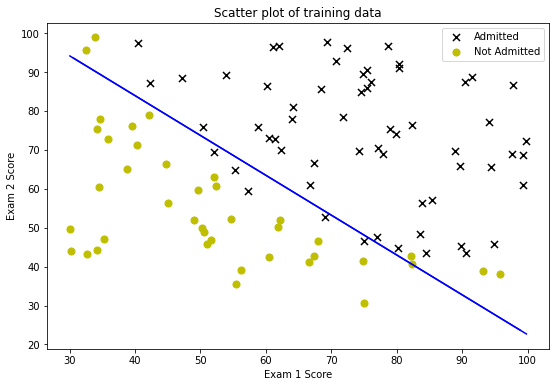

In [109]:
x = np.linspace(data.iloc[:,1:-1].min(), data.iloc[:,1:-1].max(), 100)
f = ( - result[0][0] - result[0][1] * x) / result[0][2]
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x, f, 'b')
ax.scatter(admitted['Score1'], admitted['Score2'], s=50, c='k', marker='x', label='Admitted')
ax.scatter(not_admitted['Score1'], not_admitted['Score2'], s=50, c='y', marker='o', label='Not Admitted')
ax.legend()
ax.set_title('Scatter plot of training data')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

#### 1.2.4 评价逻辑回归

在学习玩参数后，我们可以使用模型来预测一个特定的学生是否被录取。对于一个Exam1得45分，Exam2得85分的学生，他的录取概率应该为 0.776。

In [110]:
def eval_predict(theta, X):
    return sigmoid(X @ theta.T)
eval_predict(result[0], [1, 45, 85])

0.7762906238162848

另一种评价参数质量的方法是查看模型在训练集上的预测效果。写一个 predict函数，在给定数据集和学习后的参数向量 $\theta$ 基础上，提供 ‘0’ 或 ‘1’ 的预测。最后通过计算正确示例的百分比来评估分类器训练的准确性。

In [111]:
def predict(theta, X):
    probability = sigmoid(X @ theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [112]:
predictions = predict(result[0], X)
correct = [1 if (a == 1 and b == 1) or (a == 0 and b == 0) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print(f'accuracy = {accuracy}%')

accuracy = 89%


## 2 正则化逻辑回归

在这一部分，将实现正则逻辑回归来预测制造工厂的微芯片能否通过质量检测。

假设你是工厂的产品经理，并有对一些微型芯片的两组不同测试的结果。你想从这两组测试中确定芯片被接受或者抛弃。为了帮助你作出决定，你拥有过去微型芯片测试结果的数据集，可以从中建立逻辑回归模型。

### 2.1 数据可视化

In [113]:
path = './data/ex2data2.txt'
data = pd.read_csv(path, header=None, names=['Test1', 'Test2', 'Accepted'])
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


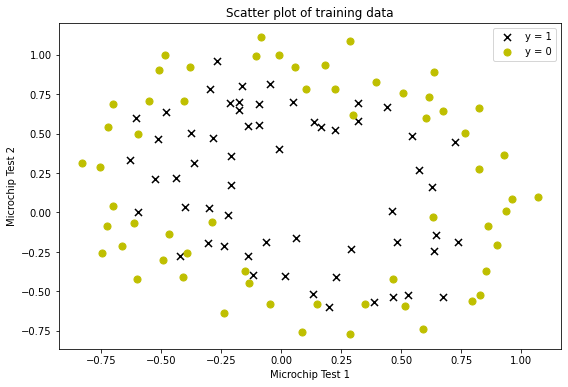

In [114]:
accepted = data[data['Accepted'].isin([1])]
rejected = data[data['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(accepted['Test1'], accepted['Test2'], s=50, c='k', marker='x', label='y = 1')
ax.scatter(rejected['Test1'], rejected['Test2'], s=50, c='y', marker='o', label='y = 0')
ax.legend()
ax.set_title('Scatter plot of training data')
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
plt.show()

以上的数据图显示，我们不能用一条直线来将数据集分为正样本和负样本。由于逻辑回归只能找到线性边界，因此直接应用在这个数据集上效果不佳，

### 2.2 特征映射

一种更好的拟合数据的方法是为每个数据点创造更多的特征，在函数mapFeature中，我们将特征映射到 $x_1$ 和 $x_2$ 的所有多项式中，最高到6次幂。

$$
mapFeature\left(x\right) = 
\left[ 
\begin{matrix}
\\
1\\
x_1\\
x_2\\
x_1^2\\
x_1x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1x_2^5\\
x_2^6\\
\end{matrix}
\right]
$$

映射的结果是，我们的两个特征向量（两个质量评估此时的分数）已转化为28维的向量。在此较高维特征向量上训练的逻辑回归分类器将具有更复杂的决策边界，并且在二维图中绘制时将显示非线性。

In [115]:
dimension = 6
x1, x2 = data['Test1'], data['Test2']
data.insert(3, "Ones", 1)


for i in range(1, dimension + 1):
    for j in range(0, i + 1):
        data[f'F{i - j}{j}'] = np.power(x1, i - j) * np.power(x2, j)

data.drop('Test1', axis=1, inplace=True)
data.drop('Test2', axis=1, inplace=True)

data.head()

,Accepted,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


尽管特征映射使我们能够构建更具表达力的分类器，但它也更容易过拟合。在练习的下一部分中，将实现正则化logistic回归以拟合数据，并了解正则化如何帮助解决过度拟合问题。

### 2.3 代价函数和梯度

这一部分要实现计算正则化逻辑回归的代价函数和梯度，逻辑回归中的正则化代价函数公式：

$$J\left(\theta \right) = \frac{1}{m} \sum\limits_{i=1}^{m} {[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} + \frac{\lambda}{2m} \sum\limits_{j=1}^{n}{\theta_j^2}$$

记住，不要正则化参数 $\theta_0$。代价函数的梯度是一个向量，其中第 $j$ 个元素的定义如下：

$$\frac{\partial J \left( \theta \right)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m {\left( {h_\theta \left( x^{\left(i\right)} \right)} - y^{\left(i\right)} \right)}x_j^{\left(i\right)} \space\space\space\space\space\space  for \space j = 0$$

$$\frac{\partial J \left( \theta \right)}{\partial \theta_j} = \Bigg( \frac{1}{m} \sum_{i=1}^m {\left( {h_\theta \left( x^{\left(i\right)} \right)} - y^{\left(i\right)} \right)}x_j^{\left(i\right)} \Bigg)  + \frac{\lambda}{m} \theta_j \space\space\space\space\space\space  for \space j \geq 1$$

下面是梯度下降的更新公式，这里并不会使用编码实现更新，而是写出计算代价和梯度的函数，使用库函数实现梯度下降

\begin{align}
& repeat \ until \ convergence \ \{ \\ 
& \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} \Big[ h_\theta \left( x^{(i)} \right) - y^{(i)} \Big] x_0^{(i)} \\
& \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} \Big[ h_\theta \left( x^{(i)} \right) - y^{(i)} \Big] x_j^{(i)} + \frac{\lambda}{m} \theta_j \\ 
& \}
\end{align}